<a href="https://colab.research.google.com/github/ajayn3300/SMS_Spam_Detector---NLP/blob/main/SMS_Spam_Detector_(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import seaborn as sns 

In [16]:
# import data
data=pd.read_csv('https://raw.githubusercontent.com/ajayn3300/SMS_Spam_Detector---NLP/main/spam.csv',encoding='latin-1')
data=data.loc[:,['v1','v2']]

In [17]:
# data sample
data.sample(3)

,v1,v2
1202,ham,"Me also da, i feel yesterday night wait til 2..."
5447,ham,So that takes away some money worries
4527,ham,HOW ARE U? I HAVE MISSED U! I HAVENT BEEN UP 2...


In [18]:
#data shape
data.shape

(5572, 2)

In [14]:
#data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


# Data Cleaning

In [20]:
# Let's rename the columns first
data.rename(columns={'v1':'target','v2':'message'},inplace=True)

In [22]:
#data sample
data.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [24]:
# null values
data.isna().sum()

target     0
message    0
dtype: int64

In [27]:
#duplicate values
data[data.duplicated()]

,target,message
102,ham,As per your request 'Melle Melle (Oru Minnamin...
153,ham,As per your request 'Melle Melle (Oru Minnamin...
206,ham,"As I entered my cabin my PA said, '' Happy B'd..."
222,ham,"Sorry, I'll call later"
325,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [28]:
# removing duplicates
data.drop_duplicates(inplace=True)

In [29]:
# new shape 
data.shape

(5169, 2)

# EDA

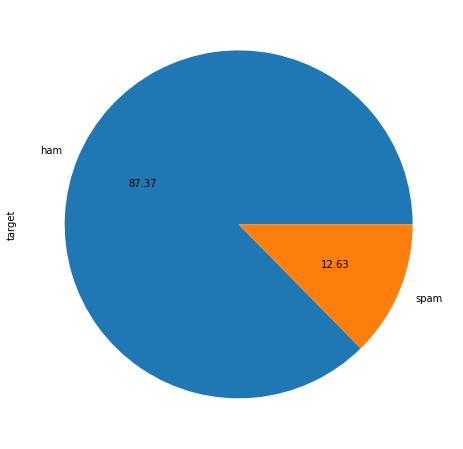

In [48]:
# lets check our target data 
plt.figure(figsize=(15,8))
data.target.value_counts().plot(kind='pie',autopct='%0.2f')

      Oops! Imbalaced dataset.

In [58]:
# add no. of character in text 
data['character_count']=data['message'].apply(len)

In [64]:
#adding column name no.of words 
nltk.download('punkt')

data['words_count']=data.message.apply(lambda x : len(nltk.word_tokenize(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [69]:
# adding column called sentence count
data['sent_count']=data.message.apply(lambda x : len(nltk.sent_tokenize(x)))

In [70]:
# data sample
data.sample(5)

,target,message,character_count,words_count,sent_count
2758,ham,What time. IÛ÷m out until prob 3 or so,39,10,2
3023,ham,I love ya too but try and budget your money be...,90,21,2
5503,ham,Perhaps * is much easy give your account ident...,82,16,1
3902,ham,Waiting in e car 4 my mum lor. U leh? Reach ho...,57,16,3
3198,ham,No de.am seeing in online shop so that i asked.,47,11,1


In [72]:
# description for ham
data[data['target']=='ham'].describe()

,character_count,words_count,sent_count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [73]:
#description for spam
data[data['target']=='spam'].describe()

,character_count,words_count,sent_count
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


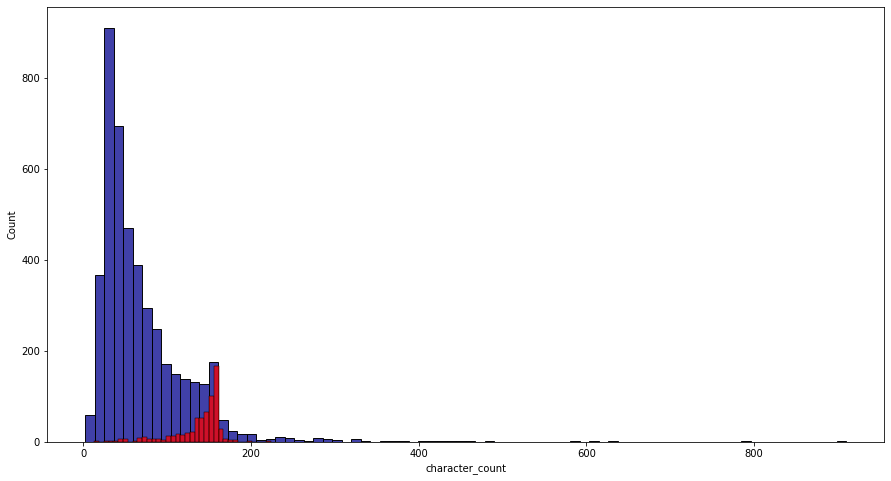

In [85]:
# Number of chacracter count
plt.figure(figsize=(15,8))
sns.histplot(data[data['target']=='ham'].character_count,color='darkblue',bins=80)
sns.histplot(data[data['target']=='spam'].character_count,color='red')

      Numbers of character count  are less in spam(red) 

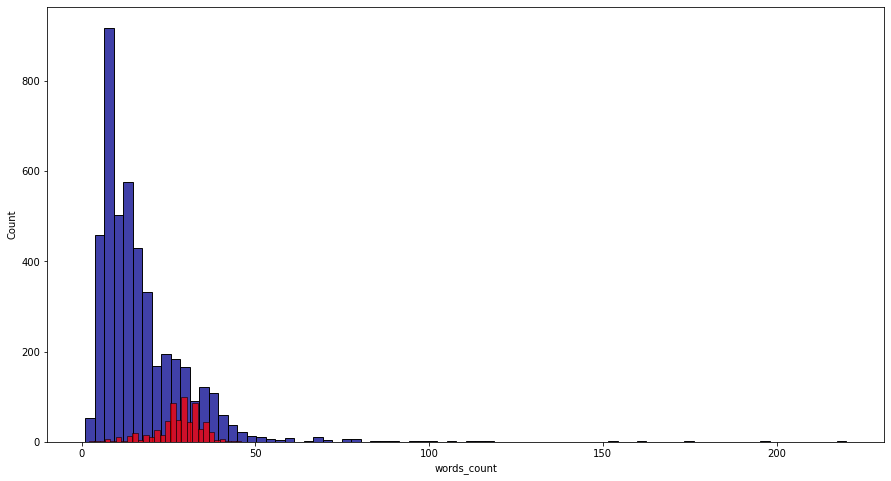

In [89]:
# no.of words count
plt.figure(figsize=(15,8))
sns.histplot(data[data['target']=='ham'].words_count,color='darkblue',bins=80)
sns.histplot(data[data['target']=='spam'].words_count,color='red')

In [91]:
data[data['target']=='ham'].words_count.mean()

17.12090345438441

<Figure size 720x576 with 0 Axes>

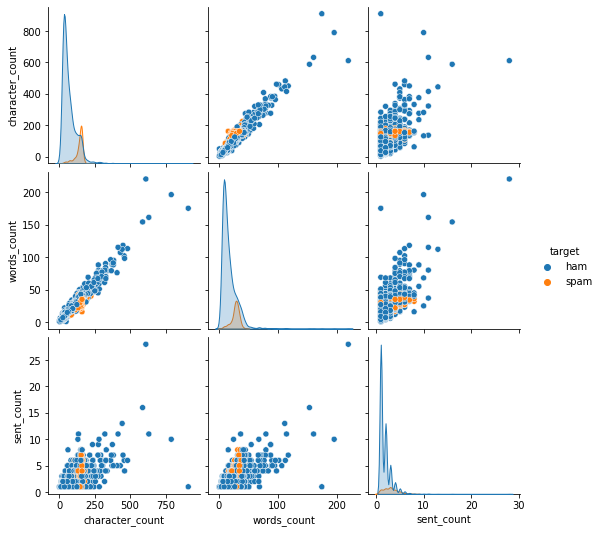

In [93]:
plt.figure(figsize=(10,8))
sns.pairplot(data,hue='target')